In [22]:
import pandas as pd
from mplsoccer.pitch import Pitch
import matplotlib as plt

In [2]:
df = pd.read_csv('valladolidA.csv')

In [3]:
df = df[df['teamId']=='Barcelona']

In [4]:
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

In [5]:
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

In [6]:
successful.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0


In [7]:
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute'] < firstSub]

In [8]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


In [9]:
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')
successful['passer'] = pas
successful['recipient'] = rec

In [10]:
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [11]:
average_locations

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [12]:
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

In [13]:
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [14]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
1,1,4,3,7.124000,50.324000,25,32.895833,43.518750,48
2,1,8,4,7.124000,50.324000,25,53.332927,41.608537,82
3,1,9,1,7.124000,50.324000,25,69.916667,51.383333,6
4,1,15,4,7.124000,50.324000,25,38.409091,74.378182,55
...,...,...,...,...,...,...,...,...,...
85,28,8,13,49.156863,16.282353,51,53.332927,41.608537,82
86,28,9,3,49.156863,16.282353,51,69.916667,51.383333,6
87,28,10,5,49.156863,16.282353,51,63.201613,42.351613,62
88,28,18,1,49.156863,16.282353,51,55.242553,83.793617,47


In [15]:
pass_between = pass_between[pass_between['pass_count']>5]

In [16]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
11,2,8,11,68.274359,11.915385,39,53.332927,41.608537,82
13,2,10,11,68.274359,11.915385,39,63.201613,42.351613,62
16,2,28,7,68.274359,11.915385,39,49.156863,16.282353,51
19,4,8,6,32.895833,43.518750,48,53.332927,41.608537,82
21,4,15,20,32.895833,43.518750,48,38.409091,74.378182,55
23,4,21,6,32.895833,43.518750,48,55.663636,52.263636,55
24,4,28,7,32.895833,43.518750,48,49.156863,16.282353,51
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
27,8,4,8,53.332927,41.608537,82,32.895833,43.518750,48
29,8,10,23,53.332927,41.608537,82,63.201613,42.351613,62


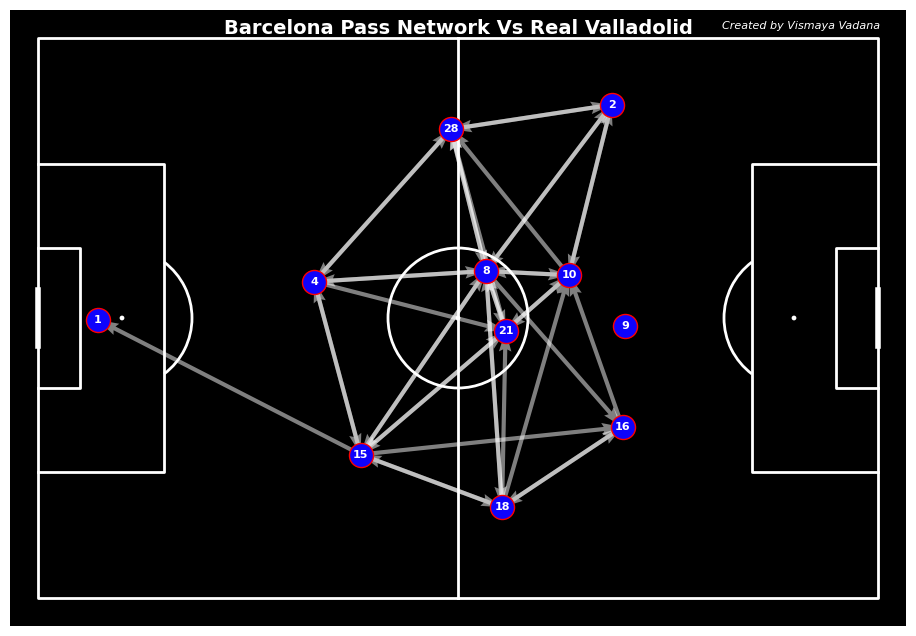

In [75]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Create figure and axis with figsize
fig, ax = plt.subplots(figsize=(13, 8))

# Create the pitch (without figsize)
pitch = Pitch(pitch_type='statsbomb', pitch_color='#000000', line_color='#ffffff')

# Draw the pitch on the provided axis
pitch.draw(ax=ax)

ax.text(109, -1, "Created by Vismaya Vadana", color='white', fontsize=8, fontstyle='italic',
        ha='center', va='bottom')

ax.text(60, 0, "Barcelona Pass Network Vs Real Valladolid", color='white', fontsize=14, fontweight='bold',
        ha='center', va='bottom')

# Plot the arrows (passing network)
arrows = pitch.arrows(1.2 * pass_between.x, 0.8 * pass_between.y, 
                      1.2 * pass_between.x_end, 0.8 * pass_between.y_end,
                      width=3, headwidth=3, color='w', ax=ax, zorder=1, alpha=0.5)

# Plot the nodes (average positions)
nodes = pitch.scatter(1.2 * average_locations.x, 0.8 * average_locations.y,
                      s=300, color='#0f03fc', edgecolors='red', linewidth=1, 
                      alpha=1, zorder=1, ax=ax)

# Overlay player numbers inside the circles
for index, row in average_locations.iterrows():
    ax.text(1.2 * row.x, 0.8 * row.y, str(index), 
            color='white', fontsize=8, fontweight='bold',
            ha='center', va='center', zorder=3)

plt.show()
